In [273]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook

In [274]:
# Read the csv file into a pandas DataFrame

all_wells = pd.read_csv('well_cleaned.csv')


In [275]:
# Difference in pressure and DH temperature(this is measured by a gauge from bottom of well) columns dropped

all_wells= all_wells.drop('DP_CHOKE_SIZE', 1)
all_wells= all_wells.drop('AVG_DOWNHOLE_TEMPERATURE', 1)
all_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5943 non-null   int64  
 1   WELL_BORE_CODE         5943 non-null   object 
 2   AVG_DOWNHOLE_PRESSURE  5943 non-null   float64
 3   AVG_CHOKE_SIZE_P       5943 non-null   float64
 4   AVG_WHP_P              5943 non-null   float64
 5   AVG_WHT_P              5943 non-null   float64
 6   BORE_OIL_VOL           5943 non-null   float64
 7   BORE_GAS_VOL           5943 non-null   float64
 8   BORE_WAT_VOL           5943 non-null   float64
 9   FLOW_KIND              5943 non-null   object 
 10  WELL_TYPE              5943 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 510.9+ KB


In [276]:
all_wells=all_wells.iloc[:,1:9]
all_wells

,WELL_BORE_CODE,AVG_DOWNHOLE_PRESSURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,NO 15/9-F-1 C,289.42,43.34,107.36,37.94,631.47,90439.09,0.00
1,NO 15/9-F-1 C,270.24,47.17,99.19,60.76,1166.46,165720.39,0.00
2,NO 15/9-F-1 C,262.84,47.73,94.60,63.05,1549.81,221707.31,0.00
3,NO 15/9-F-1 C,255.53,48.53,89.99,64.55,1248.70,178063.52,0.00
4,NO 15/9-F-1 C,247.20,49.84,84.78,65.72,1345.78,192602.19,0.00
...,...,...,...,...,...,...,...,...
5938,NO 15/9-F-15 D,194.98,31.58,15.81,49.02,144.01,23201.35,203.93
5939,NO 15/9-F-15 D,194.98,31.54,15.77,48.99,145.22,23068.07,202.93
5940,NO 15/9-F-15 D,194.32,31.52,15.70,50.10,142.74,23059.68,203.84
5941,NO 15/9-F-15 D,195.21,31.52,15.61,49.84,144.46,23090.47,202.76


Dependencies for regression analysis

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso


In [278]:
list_well = list (all_wells["WELL_BORE_CODE"].unique())
list_well

['NO 15/9-F-1 C',
 'NO 15/9-F-11 H',
 'NO 15/9-F-12 H',
 'NO 15/9-F-14 H',
 'NO 15/9-F-15 D']

## Random Forest Regression

In [279]:
target = all_wells['AVG_DOWNHOLE_PRESSURE'].values.reshape(-1, 1)
target.shape

(5943, 1)

In [280]:
data = all_wells.drop(["AVG_DOWNHOLE_PRESSURE","WELL_BORE_CODE"], axis=1)
data.shape

(5943, 6)

In [281]:
df1= pd.DataFrame({'Features':["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]})
df1.set_index('Features')

""
Features
AVG_CHOKE_SIZE_P
AVG_WHP_P
AVG_WHT_P
BORE_OIL_VOL
BORE_GAS_VOL
BORE_WAT_VOL


(430, 6)
(430, 1)


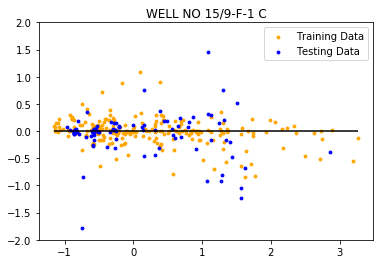

Mean Square Error : 0.18
R2 : 0.79
[0.10474505563695075, 0.3539984306716177, 0.037037579865349626, 0.20176030109669946, 0.1551664637664599, 0.14729216896292266]
(1118, 6)
(1118, 1)


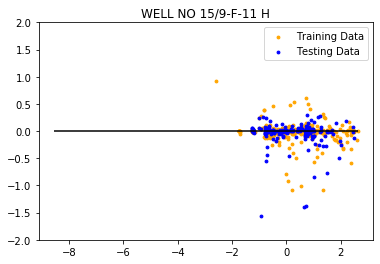

Mean Square Error : 0.18
R2 : 0.79
[0.026906186524066972, 0.43835651143987747, 0.04952434326510495, 0.31600507631070246, 0.0656080777172584, 0.10359980474298972]
(925, 6)
(925, 1)


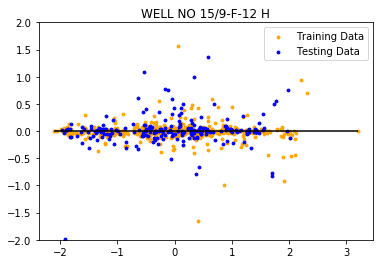

Mean Square Error : 0.11
R2 : 0.89
[0.08528745497735837, 0.3948868457351489, 0.03527788587016972, 0.31858848734114265, 0.0382654419249537, 0.12769388415122673]
(2703, 6)
(2703, 1)


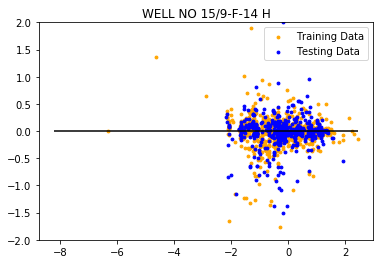

Mean Square Error : 0.42
R2 : 0.64
[0.025343311128278468, 0.1559616207294326, 0.12802747261555397, 0.2742098051123608, 0.3093482586490256, 0.1071095317653485]
(767, 6)
(767, 1)


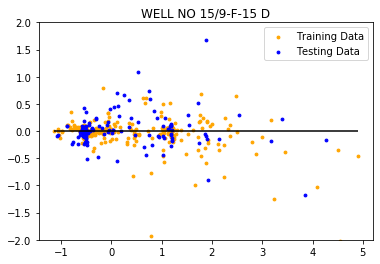

Mean Square Error : 0.07
R2 : 0.93
[0.06824707596376169, 0.5353142128508714, 0.018403709949781195, 0.02751975613292626, 0.028573546964746916, 0.32194169813791246]


In [282]:
# Looping through all 5 wells

for i in list_well:
    
#   Independednt Variables
    X =(all_wells.loc[all_wells["WELL_BORE_CODE"]== i])[["AVG_CHOKE_SIZE_P","AVG_WHP_P","AVG_WHT_P","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL"]]
    print(X.shape)
    
#   Target Variable
    y=(all_wells.loc[all_wells["WELL_BORE_CODE"]== i])["AVG_DOWNHOLE_PRESSURE"].values.reshape(-1, 1)
    print(y.shape)

#  Split to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
        
#   Scale X and y
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
    
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    
    rf = RandomForestRegressor(n_estimators=5,max_depth=10)
    rf = rf.fit(X_train_scaled, y_train_scaled.ravel())
    
    #   Plot the Residuals for the Training and Testing data
    predictions_train = rf.predict(X_train_scaled)
    predictions_test = rf.predict(X_test_scaled)
    
    plt.scatter(predictions_train, predictions_train - y_train_scaled.ravel(), c= "orange",label="Training Data", s=8)
    plt.scatter(predictions_test, predictions_test - y_test_scaled.ravel(), c= "blue",label="Testing Data",s=8)
    plt.ylim(-2,2)
    plt.hlines(y=0, xmin=predictions_train.min(), xmax=predictions_train.max())
    plt.title(f'WELL {i}')
    plt.legend()
    plt.show()
    
    MSE = mean_squared_error(y_test_scaled.ravel(), predictions_test)
    r2=rf.score(X_test_scaled, y_test_scaled.ravel())
    print (f'Mean Square Error : {round(MSE,2)}')
    print (f'R2 : {round (r2,2)}')
    
    print(list(rf.feature_importances_))
    df1[i]=list(rf.feature_importances_)
    

In [283]:
df1=df1.round(2)
df1=df1.set_index(["Features"], drop= True)
df1

,NO 15/9-F-1 C,NO 15/9-F-11 H,NO 15/9-F-12 H,NO 15/9-F-14 H,NO 15/9-F-15 D
Features,,,,,
AVG_CHOKE_SIZE_P,0.10,0.03,0.09,0.03,0.07
AVG_WHP_P,0.35,0.44,0.39,0.16,0.54
AVG_WHT_P,0.04,0.05,0.04,0.13,0.02
BORE_OIL_VOL,0.20,0.32,0.32,0.27,0.03
BORE_GAS_VOL,0.16,0.07,0.04,0.31,0.03
BORE_WAT_VOL,0.15,0.10,0.13,0.11,0.32


In [284]:
df1_T= df1.T

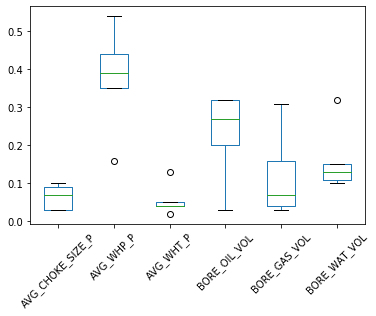

In [285]:
ax = df1_T.plot.box(rot=45)